In [130]:
# Get required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [131]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Exploration

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [133]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [134]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1) # Drop the columns that are not required

In [135]:
df.columns = ['label', 'message'] # Rename the columns

In [136]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [137]:
df["message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [138]:
df["label"].value_counts(normalize=True) # Check the distribution of the target variable and it is imbalanced

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

<Axes: xlabel='label'>

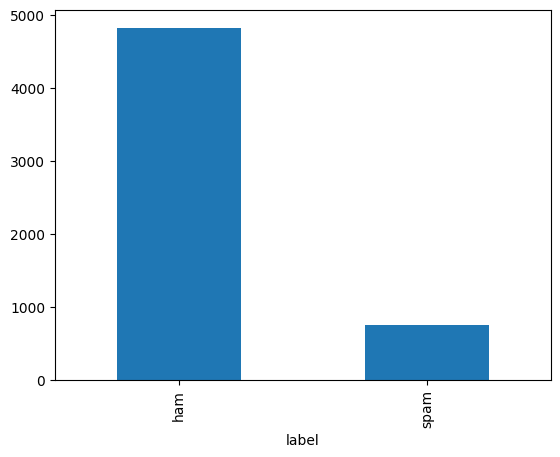

In [139]:
df["label"].value_counts().plot(kind="bar") # Plot the distribution of the target variable

In [140]:
#df["label"] = df["label"].map({"ham": 0, "spam": 1}) # Convert the target variable to numerical

# Use Default CountVectorizer and TfidfVectorizer

In [141]:
#Train test split
from sklearn.model_selection import train_test_split

X = df["message"]
y = df["label"]

input_X, test_X, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [142]:
# Tokenize the data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(input_X)
X_test = vectorizer.transform(test_X)

In [143]:
# Train the model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

In [144]:
# Evaluate the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, pos_label='spam'))
print("Recall Score: ", recall_score(y_test, y_pred, pos_label='spam'))
print("F1 Score: ", f1_score(y_test, y_pred, pos_label='spam'))
print("ROC AUC Score: ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  0.9847533632286996
Precision Score:  0.9574468085106383
Recall Score:  0.9246575342465754
F1 Score:  0.9407665505226481
ROC AUC Score:  0.980611278397444
Confusion Matrix:  [[963   6]
 [ 11 135]]
Classification Report:                precision    recall  f1-score   support

         ham       0.99      0.99      0.99       969
        spam       0.96      0.92      0.94       146

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [145]:
# Output for CountVectorizer
# Accuracy:  0.9847533632286996
# Precision Score:  0.9574468085106383
# Recall Score:  0.9246575342465754
# F1 Score:  0.9407665505226481
# ROC AUC Score:  0.
# Confusion Matrix:  [[963   6]
# [ 11 135]]

In [146]:
# Output for TfidfVectorizer
# Accuracy:  0.9730941704035875
# Precision Score:  1.0
# Recall Score:  0.7945205479452054
# F1 Score:  0.8854961832061069
# ROC AUC Score:  0.9849018194155816
# Confusion Matrix:  [[969   0]
# [ 30 116]]

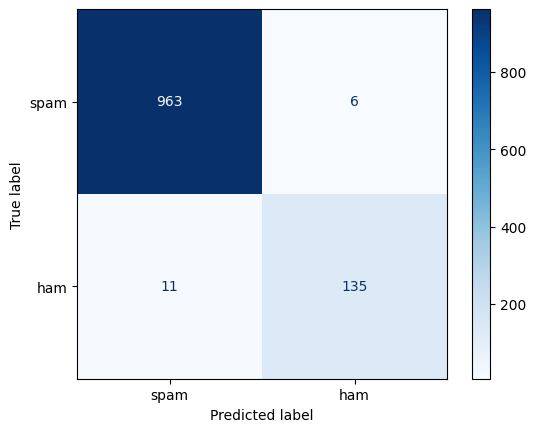

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate and plot confusion matrix using sklearn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spam", "ham"])
disp.plot(cmap='Blues', values_format='d')
plt.show()


In [148]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

# Convert the target variable to numerical
yTest = y_test.map({"ham": 0, "spam": 1})
 
#compute fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(yTest,model.predict_proba(X_test)[:,1])

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

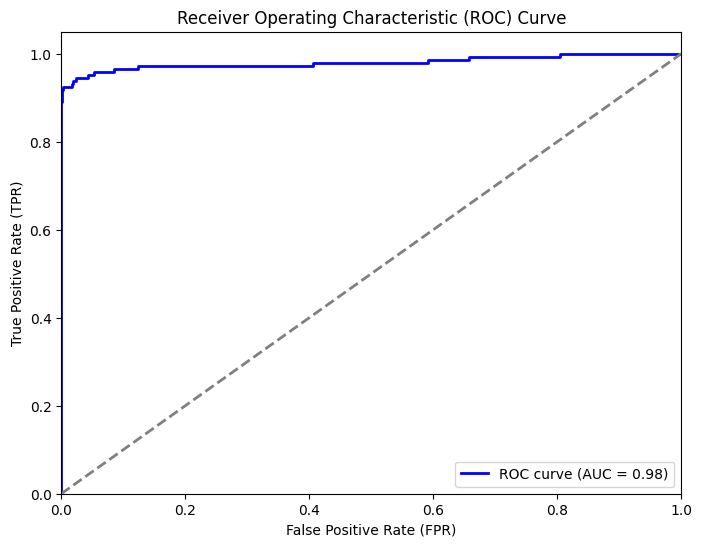

In [149]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Generate Word Cloud to See Most Common Words

In [150]:
#visualize the most common words in the spam and ham messages
from wordcloud import WordCloud

def visualize_words(label):
    wordcloud = WordCloud(width = 800, height = 800,)
    wordcloud = wordcloud.generate(str(df[df['label']==label]['message']))

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

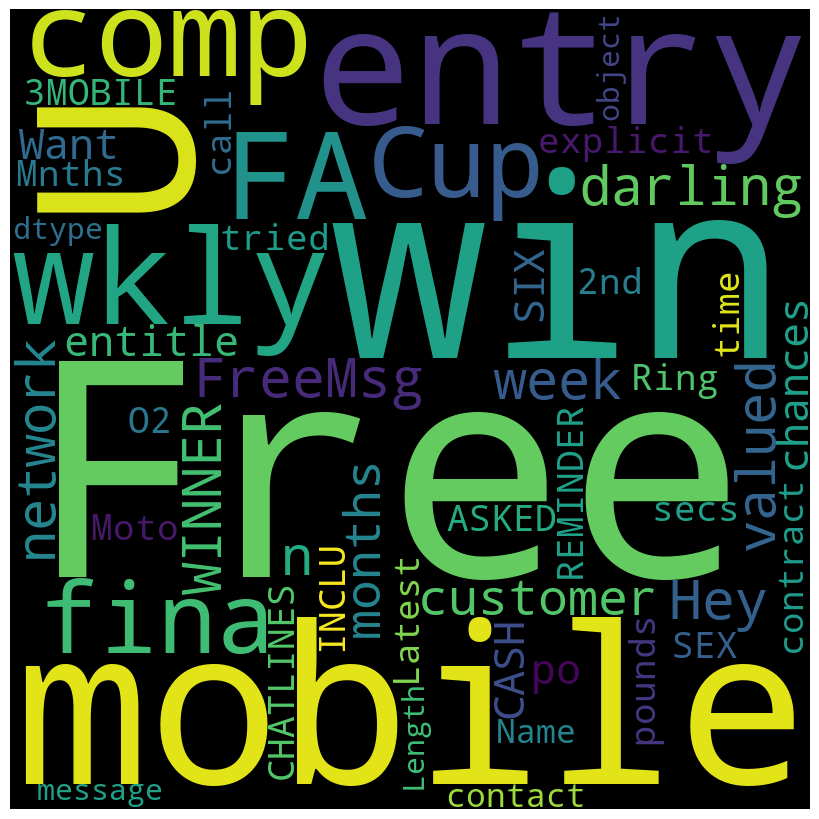

In [151]:
visualize_words('spam')

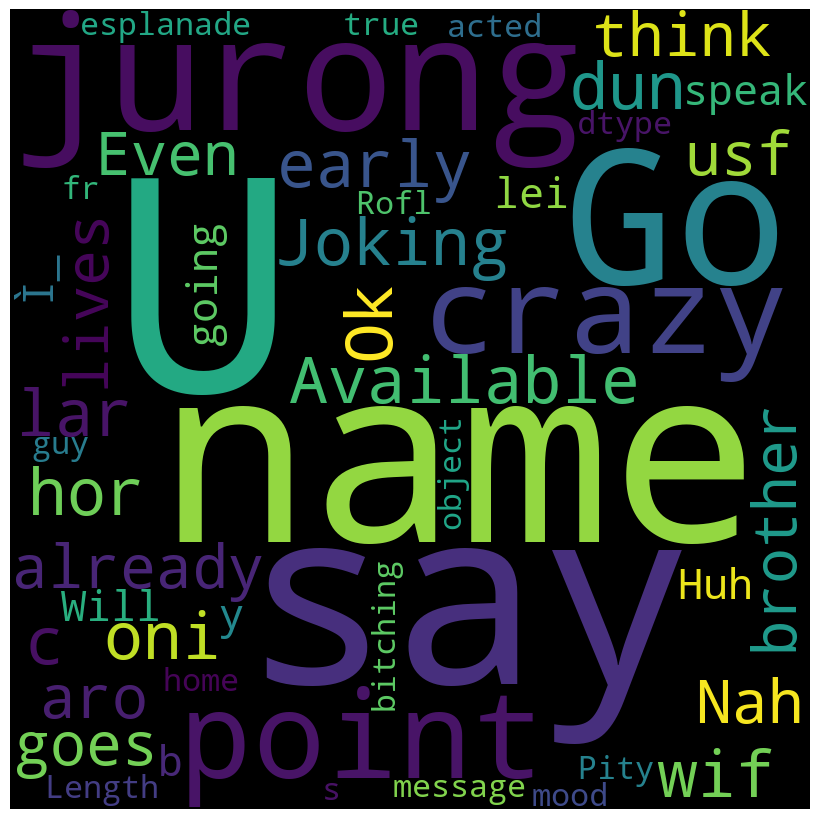

In [152]:
visualize_words('ham')

# Including Stemming

In [153]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk import word_tokenize

In [154]:
def stemming_text(text):
    porter = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_words = [porter.stem(word) for word in tokens]
    return stemmed_words

In [155]:
vectorizer = CountVectorizer(stop_words='english', tokenizer=stemming_text)
X_train = vectorizer.fit_transform(input_X)
X_test = vectorizer.transform(test_X)

c:\Users\nemau\OneDrive\Documents\Training\NLP Training\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\nemau\OneDrive\Documents\Training\NLP Training\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon'

Accuracy:  0.9847533632286996
Precision Score:  0.9777777777777777
Recall Score:  0.9041095890410958
F1 Score:  0.9395017793594306
ROC AUC Score:  0.9704680718718633



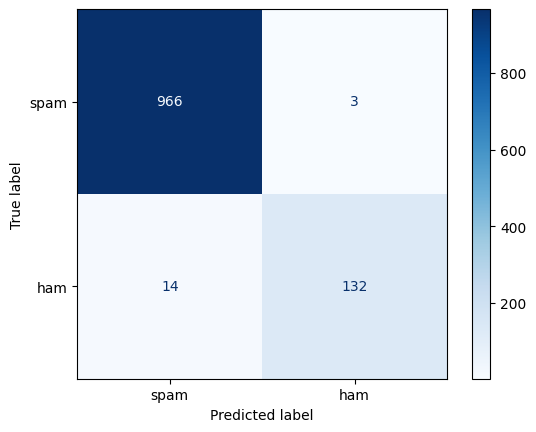

In [156]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, pos_label='spam'))
print("Recall Score: ", recall_score(y_test, y_pred, pos_label='spam'))
print("F1 Score: ", f1_score(y_test, y_pred, pos_label='spam'))
print("ROC AUC Score: ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

#create confusion matrix
print("")
cm = confusion_matrix(y_test, y_pred)

# Generate and plot confusion matrix using sklearn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spam", "ham"])
disp.plot(cmap='Blues', values_format='d')
plt.show()

# Include Lemmatization

In [157]:
# this function will convert the nltk pos tags to wordnet pos tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [158]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    words_and_tags = pos_tag(tokens)
    lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word,tag in words_and_tags]
    return lemmatized_words

In [159]:
vectorizer = CountVectorizer(stop_words='english', tokenizer=lemmatize_text)
X_train = vectorizer.fit_transform(input_X)
X_test = vectorizer.transform(test_X)

c:\Users\nemau\OneDrive\Documents\Training\NLP Training\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\nemau\OneDrive\Documents\Training\NLP Training\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  warnings.warn(


Accuracy:  0.9829596412556054
Precision Score:  0.9774436090225563
Recall Score:  0.8904109589041096
F1 Score:  0.931899641577061
ROC AUC Score:  0.9696976122821155



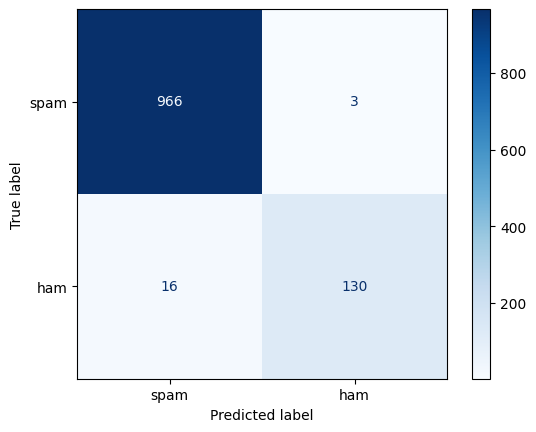

In [160]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, pos_label='spam'))
print("Recall Score: ", recall_score(y_test, y_pred, pos_label='spam'))
print("F1 Score: ", f1_score(y_test, y_pred, pos_label='spam'))
print("ROC AUC Score: ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

#create confusion matrix
print("")
cm = confusion_matrix(y_test, y_pred)

# Generate and plot confusion matrix using sklearn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["spam", "ham"])
disp.plot(cmap='Blues', values_format='d')
plt.show()

# Deploy Model Using Fast API

In [173]:
# Basic Model is the best therefore it is used in deployment
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(input_X)
X_test = vectorizer.transform(test_X)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [174]:
def predict_pipeline(input_text):
    token = vectorizer.transform([input_text])
    prediction = model.predict(token)
    return prediction[0]

In [175]:
predict_pipeline("Congratulations! You have won a free ticket to the Bahamas. Text 'WIN' to 12345 to claim your prize.")

np.str_('spam')

In [183]:
from fastapi import FastAPI
from pydantic import BaseModel
import uvicorn

import nest_asyncio
import asyncio

In [184]:
# Allow nested async calls to allow running the FastAPI app inside a Jupyter notebook
nest_asyncio.apply()

app = FastAPI()

class Message(BaseModel):
    text: str
    
class Prediction(BaseModel):
    label: str
    
@app.get("/")
def home():
    return "{Welcome to the Spam Detection API! \nhealth_check: OK}"

@app.post("/predict", response_model=Prediction)
def predict_spam(message: Message):
    prediction = predict_pipeline(message.text)
    return {"label": prediction}

# Run the FastAPI app
uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [22256]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:61471 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:61589 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:61589 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:61599 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:61618 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [22256]
